In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split

In [69]:
sentiment  = {'positive': 1,'neutral': 0,'negative':-1} 

In [70]:
df_1 = pd.read_csv('input/financial-news/all-data.csv',delimiter=',',encoding='latin-1', names=['sentiment', 'text'])
df_1.rename(columns = {'sentiment':'label'}, inplace = True)
df_1.label = [sentiment[item] for item in df_1.label] 

In [71]:
df_2 = pd.read_csv('input/tweets/tweets_labelled_09042020_16072020.csv',on_bad_lines='skip', sep = ';')
df_2 = df_2.dropna()[['text','sentiment']]
df_2.rename(columns = {'sentiment':'label'}, inplace = True)
df_2.label = [sentiment[item] for item in df_2.label] 

In [72]:
df_3 = pd.read_csv('input/tweets/stock_data.csv')
df_3.rename(columns = {'Sentiment':'label', 'Text':'text'}, inplace = True)

In [73]:
df = pd.concat([df_1, df_2, df_3])
df

,label,text
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...
...,...,...
5786,-1,Industry body CII said #discoms are likely to ...
5787,-1,"#Gold prices slip below Rs 46,000 as #investor..."
5788,1,Workers at Bajaj Auto have agreed to a 10% wag...
5789,1,"#Sharemarket LIVE: Sensex off day’s high, up 6..."


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


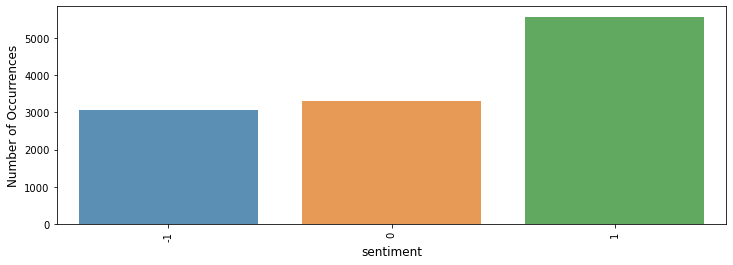

In [74]:
sentiment = df['label'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(sentiment.index, sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [75]:
train, test = train_test_split(df, test_size=0.1)

In [76]:
train.to_csv('input/train.csv', index = False)  

In [77]:
test.to_csv('input/test.csv', index = False)  

In [79]:
train

,label,text
540,0,Rautakesko 's business operations in Norway an...
75,0,On the route between Helsinki in Finland and T...
2525,-1,COMPQ SPX IND AIG KFT AEP Futures traded in r...
1442,1,Through this transaction we are able to partic...
1908,0,"Panostaja treats its negotiating partners , su..."
...,...,...
4396,1,"AAP Gap bottom 437.72, gap top 441.34 and now ..."
3027,0,Mercator will use the software for its logisti...
2237,1,The offer represents a premium of 24 % over th...
2225,1,WMT want more march calls
